In [ ]:
#import necessary packages
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import RidgeCV, LassoCV

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV

%precision %.7g
%matplotlib inline

In [ ]:
#importing data
data = pd.read_csv("https://raw.githubusercontent.com/pames-chap/CPSC392/main/Data/wine-quality-white-and-red.csv")
#used to shuffle data, there were some modelling issues
data = data.sample(frac=1)

data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2799,white,6.7,0.16,0.37,1.3,0.036,45.0,125.0,0.98964,3.19,0.51,12.4,7
4249,white,5.5,0.23,0.19,2.2,0.044,39.0,161.0,0.99209,3.19,0.43,10.4,6
1817,white,7.2,0.50,0.00,0.8,0.034,46.0,114.0,0.99320,3.19,0.34,9.2,4
2179,white,7.7,0.24,0.31,1.3,0.047,33.0,106.0,0.99300,3.22,0.55,10.8,6
5136,red,7.2,0.63,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0,6


In [ ]:
predictors = ["fixed acidity", "volatile acidity", "citric acid", 
             "residual sugar", "chlorides", "free sulfur dioxide", 
             "total sulfur dioxide", "density", "pH", "sulphates", 
             "alcohol", "quality"]

X = data[predictors]
y = data["type"]

1) What supervised model would work best for the classification of different wines? (Decision tree, Logit, KNN)

*note I replaced Naive Bayes with a Logit model from my original plan since it was a more competitive comparison. I also had to use a different ggplot to compare variables within our dataset instead of graphing the color clustered plot since there were complications from our data which made the latter difficult. 

In [ ]:
#decision tree, KNN, logit
np.random.seed(392)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


knn = KNeighborsClassifier()
lr = LogisticRegression()
tree = DecisionTreeClassifier()
kf = KFold(5)

for train,test in kf.split(X):
    X_train = X.iloc[train] 
    X_test = X.iloc[test]
    y_train = y.iloc[train]
    y_test = y.iloc[test]
    
    #z-score
    z = make_column_transformer((StandardScaler(), predictors))
    
    #parameter tuning KNN
    pipe1 = make_pipeline(z, knn)
    ks = {"kneighborsclassifier__n_neighbors": range(1, 30)}
    grid1 = GridSearchCV(pipe1, ks, scoring = "accuracy", cv = 5, refit = True)
    knn_mod = grid1.fit(X_train, y_train)
    
    #parameter tuning TREE
    pipe2 = make_pipeline(z, tree)
    depths = {"decisiontreeclassifier__max_depth": range(1, 9)}
    grid2 = GridSearchCV(pipe2, depths, scoring = "accuracy", cv = 5, refit = True)
    tree_mod = grid2.fit(X_train, y_train)
    
    #LOGIT Model
    lr_mod = lr.fit(X_train, y_train)

    print("K value:",knn_mod.best_estimator_.get_params()["kneighborsclassifier__n_neighbors"])    
    print("Max Tree Depth:",tree_mod.best_estimator_.get_params()
          ["decisiontreeclassifier__max_depth"])
    
    print("LR train accuracy", accuracy_score(y_train, lr_mod.predict(X_train)))
    print("LR test accuracy",accuracy_score(y_test, lr_mod.predict(X_test)))
    print("DT train accuracy", accuracy_score(y_train, tree_mod.predict(X_train)))
    print("DT test accuracy",accuracy_score(y_test, tree_mod.predict(X_test)))
    print("KNN train accuracy", accuracy_score(y_train, knn_mod.predict(X_train)))
    print("KNN test accuracy",accuracy_score(y_test, knn_mod.predict(X_test)))
    
    


K value: 7
Max Tree Depth: 8
LR train accuracy 0.9794111987685203
LR test accuracy 0.9792307692307692
DT train accuracy 0.9949971137194535
DT test accuracy 0.9869230769230769
KNN train accuracy 0.9942274389070618
KNN test accuracy 0.9915384615384616
K value: 9
Max Tree Depth: 6
LR train accuracy 0.9822974793149895
LR test accuracy 0.9723076923076923
DT train accuracy 0.9942274389070618
DT test accuracy 0.9761538461538461
KNN train accuracy 0.9940350202039638
KNN test accuracy 0.9923076923076923
K value: 1
Max Tree Depth: 7
LR train accuracy 0.9796075413620623
LR test accuracy 0.9815242494226328
DT train accuracy 0.9957676029242016
DT test accuracy 0.9776751347190146
KNN train accuracy 0.9996152366294728
KNN test accuracy 0.9930715935334873
K value: 5
Max Tree Depth: 7
LR train accuracy 0.9790303963062716
LR test accuracy 0.9815242494226328
DT train accuracy 0.9944209311273566
DT test accuracy 0.9861431870669746
KNN train accuracy 0.9948056944978838
KNN test accuracy 0.9961508852963818


Decision tree confusion matrix


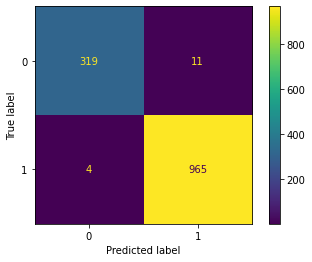

In [ ]:
    print("Decision tree confusion matrix")
    plot_confusion_matrix(tree_mod,X_test,y_test)

Logit confusion matrix


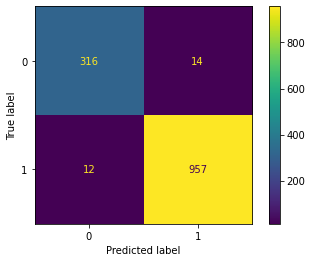

In [ ]:
print("Logit confusion matrix")
plot_confusion_matrix(lr_mod,X_test,y_test)

KNN confusion matrix


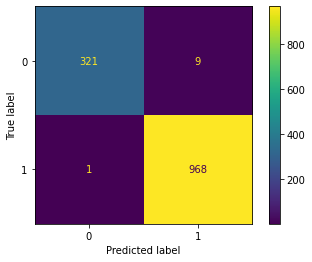

In [ ]:
 print("KNN confusion matrix")
 plot_confusion_matrix(knn_mod,X_test,y_test)

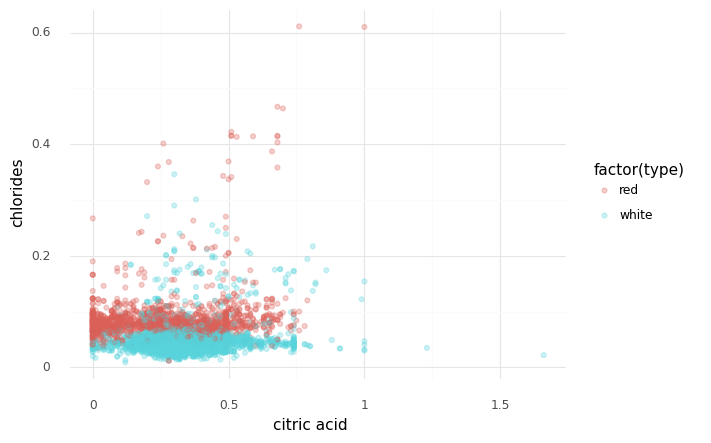

{<ggplot: (8794563070537)>}

In [ ]:
#citric acid vs chlorides show the high cohesion and low separation of our dataset well
{ggplot(data, aes(x = "citric acid", y = "chlorides", color = "factor(type)")) 
 + geom_point(alpha = 0.3) + theme_minimal()}

ANSWER 1: Due to the extremely high accuracy scores, all of these models work very well with our data in predicting different wine types. However, we can see that the KNN model had the highest accuracy scores and slightly lower incorrect predictions than the logit and decision tree model. Based on using the parameter tuning for loop we were able to determine that the lower the number of neighbors the higher the accuacy within our model. This could make sense as well since these wines are all so similar their closest neighbor may actually be the best classifier. Furthermore, the optimal value for k (number of neighbors) was only 1 based on these results. This shows us that the nearest neighbor is the best predictor of whether that data point is red or white wine. While the other models performed very well, we can see that KNN would work best due to its ability to classify dense clusters. Our dataset is extremely cohesive, with a relativel small number of outliers making KNN the most efficient model to use.

2) Is there any collinearity between the variables which could affect the accuracy of the model? For example, free sulfur dioxide and total sulfur dioxide.

In [ ]:
data_binary = pd.get_dummies(data)
data_binary = data_binary.drop(["type_red"], axis=1)
data_binary.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
2799,6.7,0.16,0.37,1.3,0.036,45.0,125.0,0.98964,3.19,0.51,12.4,7,1
4249,5.5,0.23,0.19,2.2,0.044,39.0,161.0,0.99209,3.19,0.43,10.4,6,1
1817,7.2,0.50,0.00,0.8,0.034,46.0,114.0,0.99320,3.19,0.34,9.2,4,1
2179,7.7,0.24,0.31,1.3,0.047,33.0,106.0,0.99300,3.22,0.55,10.8,6,1
5136,7.2,0.63,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0,6,0


In [ ]:
predictors = ["fixed acidity", "volatile acidity", "citric acid", 
             "residual sugar", "chlorides", "free sulfur dioxide", 
             "total sulfur dioxide", "density", "pH", "sulphates", 
             "alcohol", "quality"]

X = data_binary[predictors]
y = data_binary["type_white"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

z = StandardScaler()

z.fit(X_train)
Xz_train = z.transform(X_train)
Xz_test = z.transform(X_test)

lsr_tune = LassoCV(cv = 5).fit(Xz_train,y_train)

print("TRAIN: ", mean_absolute_error(y_train, lsr_tune.predict(X_train)))
print("TEST : ", mean_absolute_error(y_test, lsr_tune.predict(X_test)))

print("\nwe chose " + str(lsr_tune.alpha_) + " as our alpha.")

TRAIN:  18.181911715128713
TEST :  18.327418794760817

we chose 0.000656023294479705 as our alpha.


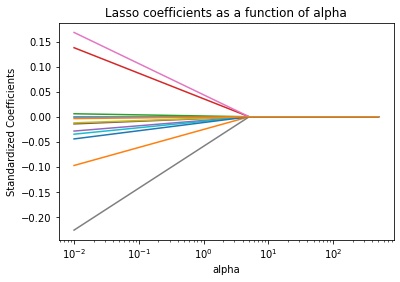

In [ ]:
alphas = np.linspace(0.01, 500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xz_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [ ]:
pca = PCA()

pca.fit(X_train, y_train)

PCA()

In [ ]:
pcaDF = pd.DataFrame({"expl_var" : pca.explained_variance_ratio_, 
                      "pc": range(1,13), 
                      "cum_var": pca.explained_variance_ratio_.cumsum()})
pcaDF

,expl_var,pc,cum_var
0,9.535154e-01,1,0.953515
1,4.071207e-02,2,0.994227
2,4.779390e-03,3,0.999007
3,4.926746e-04,4,0.999499
4,3.421428e-04,5,0.999842
5,1.365205e-04,6,0.999978
6,8.799934e-06,7,0.999987
7,5.757412e-06,8,0.999993
8,4.107239e-06,9,0.999997
9,2.963686e-06,10,1.000000


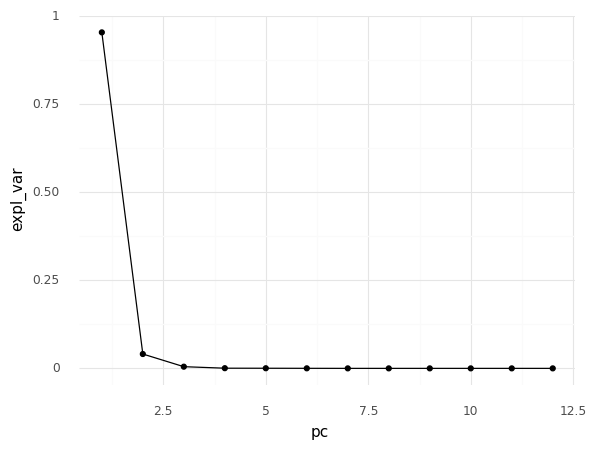

{<ggplot: (8794563047141)>}

In [ ]:
{(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + 
  geom_line() + 
  geom_point() + 
  theme_minimal())}

ANSWER 2: Based on the values low value of our alpha parameter in our LASSO model we tuned, we can determine that all of the features in our model are important. As we can see from the graphed LASSO regression model our variables converge on the same point near 0 (for our alpha value) indicating that the model cannot classify certain variables as being  greater predictors over others. If this were the case, we would see some variables dropping out before others with the more important ones continuing as alpha increased. Based on this finding, I included a PCA model to determine the best number of components for our model and compare it against LASSO regression. PCA determined that we would only neeed a single principle component to determine nearly 95% of the variation in the data, with 9-10 components representing 100%. This shows that our dataset could be greatly reduced without a significant impact on the overall accuracy scores. Lastly, I was unable to determine the collinearity between the variables based on these two graphs, but when I compared the ggplots of different variables during my initial exploration I was able to see there was little to no pattern in their relationships with one another. If there were better ways to plot the coefficients of our LASSO model in python we could probably determine which variables have the largest magnitutude initially but due to the lack of information within the LASSO ggplot PCA probably gives us enough information to determine that our dataset could use variable reduction and regularization to improve performance and accuracy.

3) With a large number of observations within the dataset (over 6000) will we be able to effectively use a model to increase the granularity of our outcome variable (type of wine) and determine different subtypes of red and white wine?

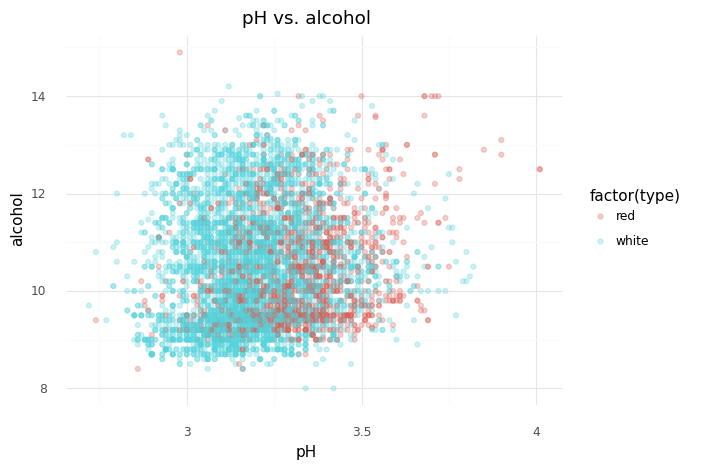

{<ggplot: (8794562545373)>}

In [ ]:
{ggplot(data, aes(x = "pH", y = "alcohol", color = "factor(type)")) 
 + geom_point(alpha = 0.3) + theme_minimal() +
 ggtitle("pH vs. alcohol")}

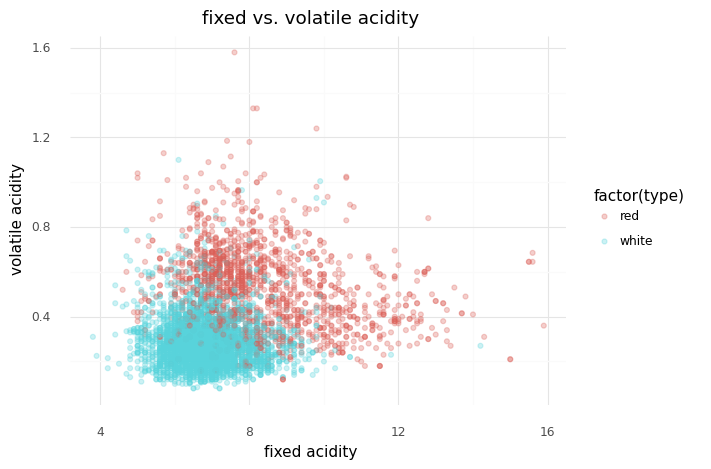

{<ggplot: (8794562874073)>}

In [ ]:
{ggplot(data, aes(x = "fixed acidity", y = "volatile acidity", color = "factor(type)")) 
 + geom_point(alpha = 0.3) + theme_minimal() +
 ggtitle("fixed vs. volatile acidity")}

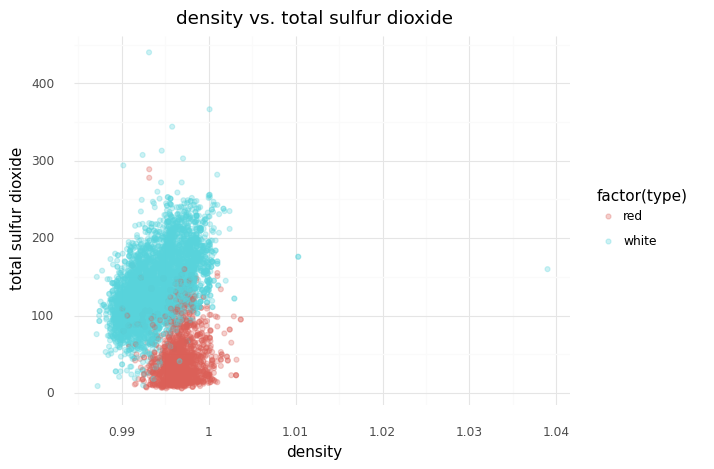

{<ggplot: (8794562607745)>}

In [ ]:
{ggplot(data, aes(x = "density", y = "total sulfur dioxide", color = "factor(type)")) 
 + geom_point(alpha = 0.3) + theme_minimal() +
 ggtitle("density vs. total sulfur dioxide")}

In [ ]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2799,white,6.7,0.16,0.37,1.3,0.036,45.0,125.0,0.98964,3.19,0.51,12.4,7
4249,white,5.5,0.23,0.19,2.2,0.044,39.0,161.0,0.99209,3.19,0.43,10.4,6
1817,white,7.2,0.50,0.00,0.8,0.034,46.0,114.0,0.99320,3.19,0.34,9.2,4
2179,white,7.7,0.24,0.31,1.3,0.047,33.0,106.0,0.99300,3.22,0.55,10.8,6
5136,red,7.2,0.63,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0,6


ANSWER 3: Based on the graphs above there is likely no way to increase the granularity of our model to determine the different subtypes of wines. We can see that certain variables have little to no significance such as pH and alcohol content. However, we begin to see more cohesive clustering when we compare fixed and volatile acidity with red wine having higher levels of both. Lastly, one of the most interesting comparison between density and total sulfur dioxide shows that both wines are similar in density, but white wine typically has higher levels of sulfure dioxide. This makes total sulfur dioxide one of our most significant variables since there are extremely cohsive and separated clusters when we compare them. As previously mentioned, we were unable to increase the granularity of our model since each graph appears to have a maximum of two distinct clusters. 

In [1]:
#import necessary packages
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


from sklearn import metrics 
from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score #model evaluation

from sklearn.model_selection import LeaveOneOut #LOO cv

%precision %.7g
%matplotlib inline

In [2]:
#importing data
data = pd.read_csv("https://raw.githubusercontent.com/pames-chap/CPSC392/main/Data/wine-quality-white-and-red.csv")
#used to shuffle data, there were some modelling issues
data = data.sample(frac=1)

data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5368,red,13.0,0.320,0.65,2.6,0.093,15.0,47.0,0.99960,3.05,0.61,10.6,5
4769,white,6.8,0.270,0.30,13.0,0.047,69.0,160.0,0.99705,3.16,0.50,9.6,6
1590,white,7.9,0.140,0.74,1.2,0.028,30.0,165.0,0.99100,3.08,0.82,12.3,6
855,white,7.4,0.200,0.35,2.1,0.038,30.0,116.0,0.99490,3.49,0.77,10.3,7
1393,white,5.7,0.135,0.30,4.6,0.042,19.0,101.0,0.99460,3.31,0.42,9.3,6


4) Which variables have the strongest impact on the quality of a wine?

In [3]:
#no rows with N/A values
datam = data
datam.isnull().sum(axis = 0)

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
#create a boolean column for type
datam["type (0=white & 1=red)"] = datam["type"] == "red"
print(datam.columns)
datam.head()

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'type (0=white & 1=red)'],
      dtype='object')


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type (0=white & 1=red)
5368,red,13.0,0.320,0.65,2.6,0.093,15.0,47.0,0.99960,3.05,0.61,10.6,5,True
4769,white,6.8,0.270,0.30,13.0,0.047,69.0,160.0,0.99705,3.16,0.50,9.6,6,False
1590,white,7.9,0.140,0.74,1.2,0.028,30.0,165.0,0.99100,3.08,0.82,12.3,6,False
855,white,7.4,0.200,0.35,2.1,0.038,30.0,116.0,0.99490,3.49,0.77,10.3,7,False
1393,white,5.7,0.135,0.30,4.6,0.042,19.0,101.0,0.99460,3.31,0.42,9.3,6,False


In [5]:
pred1m = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type (0=white & 1=red)']

out1m = ['quality']

Xm = datam[pred1m]
ym = datam[out1m]

#z-score
zm = StandardScaler()

Xzm = zm.fit_transform(Xm)

Xzm

array([[ 4.46234768, -0.11946024,  2.28046489, ...,  0.52913088,
         0.09072393,  1.75018984],
       [-0.32037042, -0.42318303, -0.12823371, ..., -0.21014415,
        -0.74776615, -0.57136659],
       [ 0.52817634, -1.21286227,  2.89984453, ...,  1.94047411,
         1.51615706, -0.57136659],
       ...,
       [-0.47465165, -0.72690581, -0.60997343, ..., -0.47897144,
        -1.41855821, -0.57136659],
       [-0.47465165,  2.15846064, -2.19283252, ...,  0.9323718 ,
        -1.08316218,  1.75018984],
       [ 0.37389511, -0.48392759, -0.05941375, ..., -0.21014415,
        -0.32852111, -0.57136659]])

In [6]:
lrm = LinearRegression()

lrm.fit(Xzm,ym)
y_predm = lrm.predict(Xzm)

In [7]:
print("TRAINING R^2: ", lrm.score(Xzm, ym))
print("TRAINING MSE: ", mean_squared_error(ym, y_predm))

TRAINING R^2:  0.2965346519296088
TRAINING MSE:  0.5363623573881138


In [8]:
coefm = pd.DataFrame({"Coef":lrm.coef_[0],"Name": pred1m})
coefm

,Coef,Name
0,0.110274,fixed acidity
1,-0.245685,volatile acidity
2,-0.009099,citric acid
3,0.297042,residual sugar
4,-0.026527,chlorides
5,0.087623,free sulfur dioxide
6,-0.079276,total sulfur dioxide
7,-0.311567,density
8,0.080187,pH
9,0.107392,sulphates


In [9]:
ym = np.array(ym)

print(ym.shape)

print(y_predm.shape)

resm = ym-y_predm

rlist = []
plist = []

for i in resm:
    rlist.append(i[0])

for i in y_predm:
    plist.append(i[0])

print(rlist[0:10])
print(plist[0:10])

(6497, 1)
(6497, 1)
[-0.8930905212180464, 0.08906224245286509, -0.6699583088435315, 1.0025289445091046, 0.4610902817085245, 0.42304581514901596, -1.221585432033259, -0.21480761596926534, -0.6086268490439819, -0.013424932230675424]
[5.893090521218046, 5.910937757547135, 6.6699583088435315, 5.997471055490895, 5.5389097182914755, 5.576954184850984, 6.221585432033259, 5.214807615969265, 5.608626849043982, 6.013424932230675]


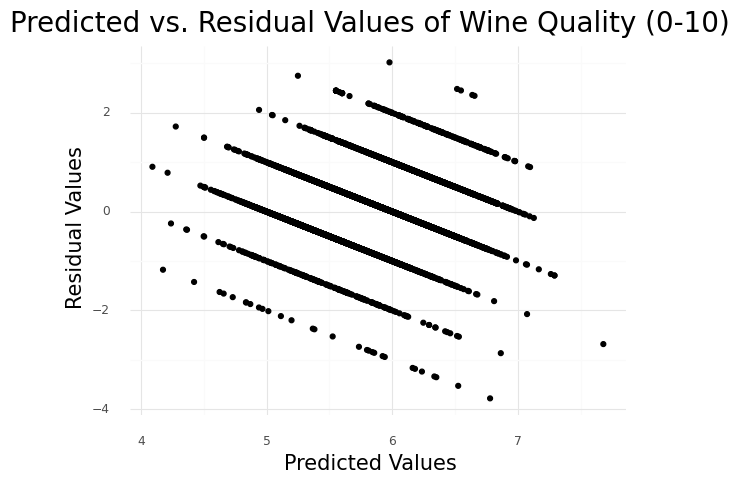

<ggplot: (8791465526749)>

In [10]:
# make residual plot

assumpm = pd.DataFrame({"error": rlist, "predicted": plist})

(ggplot(assumpm, aes(x = "predicted", y = "error")) + geom_point() + theme_bw()+ 
 ggtitle("Predicted vs. Residual Values of Wine Quality (0-10)") +
 labs(x = "Predicted Values", y = "Residual Values") +
 theme_minimal() +
 theme(axis_title_x = element_text(size = 15),
      axis_title_y = element_text(size = 15),
      plot_title = element_text(size = 20)))

The predicted versus residual values of wine quality; predictions were made by a linear regression model which predicted quality based upon a variety of quanitative factors.

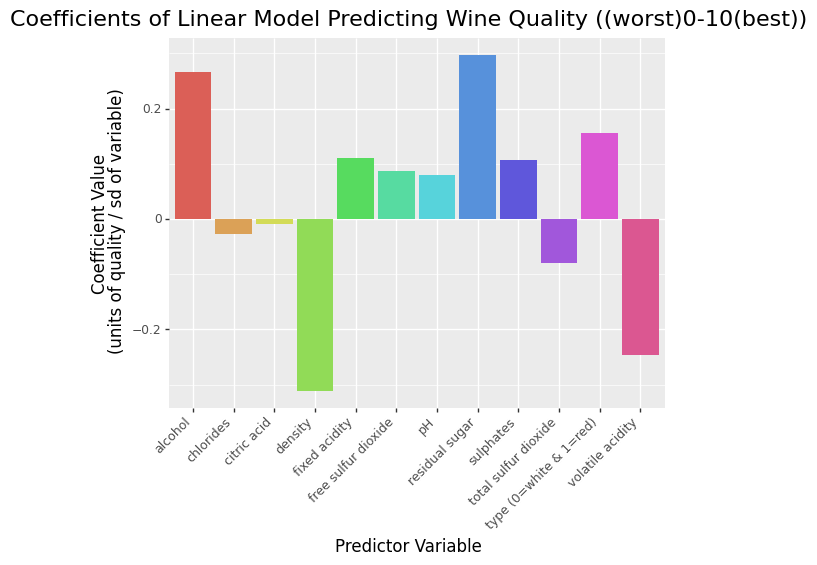

<ggplot: (8791465522809)>

In [11]:
(ggplot(coefm, aes(x="Name",y="Coef",fill = "Name"))+geom_col()+ 
 ggtitle("Coefficients of Linear Model Predicting Wine Quality ((worst)0-10(best))") +
 labs(x = "Predictor Variable", y = "Coefficient Value \n(units of quality / sd of variable)")  +
 theme(axis_title_x = element_text(size = 12),
      axis_title_y = element_text(size = 12),
      plot_title = element_text(size = 16),
      legend_position = "none",axis_text_x = element_text(size = 9,rotation=45, hjust=1)))

The quantitative predictors and corresponding coefficients of the linear regression model predicting wine quality.

ANSWER 4: The analysis of the wine data set, containing red and white wines, revealed that the density of the wine has the biggest effect on the quality of a given wine. The linear regression model did performed decently well on the training set. The MSE of the set was about 0.5 for the training set; this value suggested that there were very small residuals (the differences between predicted and true values) in this model. Thus, the model predicted the values of quality quite acurrately. Interestingly, the R^2 value for the set was about 0.3 which meant that the data did not fit into the linear model well (i.e. the line of regression did not fit the data entirely (only about 30% of the data)). This was supported by the *Predicted vs. Residual Values of Wine Quality (0-10)* plot which showed assuming linearity and homoscedasticity was not entirely possible; the trend in the data was not consistent and the error in the data changed drastically based on the quality of wine (outcome). This may have contributed to the mediocre fit to training data by the regression model. Reguardless of the data's fit to the linear model, it did predict accurately and coefficient data about each variable was still extracted. The magnitude of a coefficient is directly proportional to the magnitide of its effect on the outcome, quality of the wine. In the *Coefficients of Linear Model Predicting Wine Quality ((worst)0-10(best))* figure, the density of the wine is shown to have the highest coefficient out of all the predictor variables. It has a value of about -0.3 units of quality per sd of density which means that for every standard deviation that density increases, the quality of the wine decreases by -0.3 units. Thus, the less dense the wine, the higher its quality.

5) How well is a decision tree able to use the properties of the wine to predict whether it is red or white, as measured by accuracy score and a confusion matrix?

*NOTE: I decided to use a K-fold with a test set size of 10%, as this would allow me to visualize and keep track of confusion matrices. If I were to have stuck with LOO, it would have been very hard to keep track of and print 100's of these matrices.*

In [12]:
print(datam.columns)

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'type (0=white & 1=red)'],
      dtype='object')


dt train accuracy 1 :  0.9989738327347357
dt test accuracy 1 :  0.9830769230769231
dt train accuracy 2 :  0.9989738327347357
dt test accuracy 2 :  0.9846153846153847
dt train accuracy 3 :  0.9948691636736788
dt test accuracy 3 :  0.9861538461538462
dt train accuracy 4 :  0.9998289721224559
dt test accuracy 4 :  0.9923076923076923
dt train accuracy 5 :  0.9967504703266632
dt test accuracy 5 :  0.9861538461538462
dt train accuracy 6 :  0.999657944244912
dt test accuracy 6 :  0.9769230769230769
dt train accuracy 7 :  0.9979476654694716
dt test accuracy 7 :  0.9892307692307692
dt train accuracy 8 :  0.9994870041039672
dt test accuracy 8 :  0.9892141756548536
dt train accuracy 9 :  0.9993160054719562
dt test accuracy 9 :  0.9799691833590138
dt train accuracy 10 :  0.9935020519835841
dt test accuracy 10 :  0.987673343605547


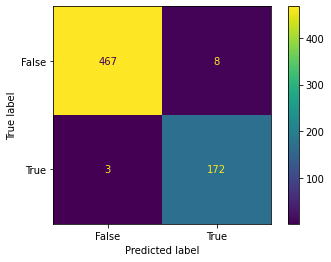

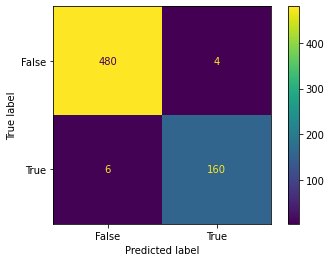

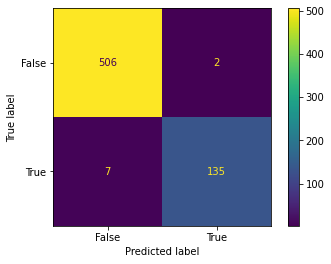

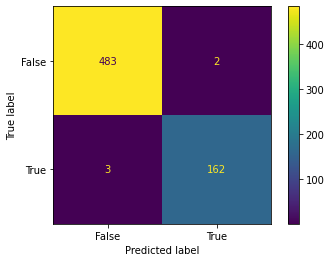

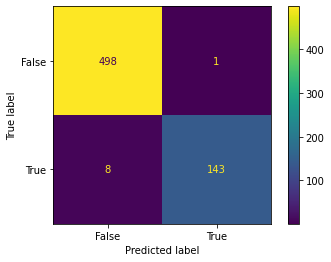

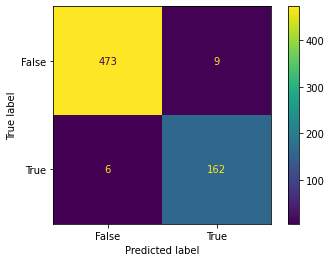

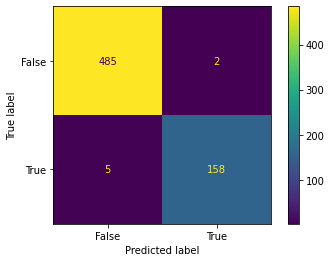

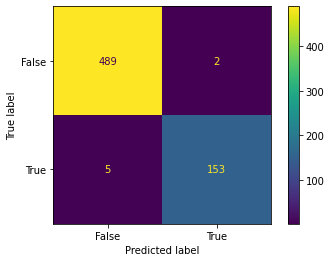

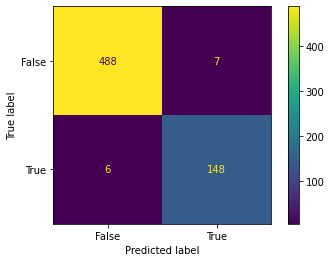

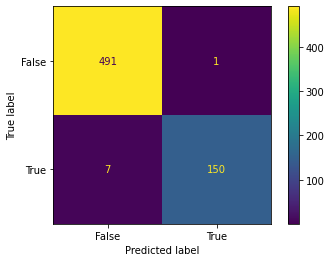

In [13]:
ac_trainm = []
ac_testm = []
conf_matrices = []

pred2m = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','quality']

out2m = ['type (0=white & 1=red)']

Xm2 = datam[pred2m]
ym2 = datam[out2m]

kfm = KFold(10)

i = 0

X_trainm, X_testm, y_trainm, y_testm = train_test_split(Xm2, ym2, test_size=0.1)

dtm = DecisionTreeClassifier()

for train,test in kfm.split(Xm2):
    X_trainm = Xm2.iloc[train] 
    X_testm = Xm2.iloc[test]
    y_trainm = ym2.iloc[train]
    y_testm = ym2.iloc[test]
    
    i=i+1
    
    #z-score
    zm2 = make_column_transformer((StandardScaler(), pred2m))
    
    #optimize dt height
    pipem = make_pipeline(zm2, dtm)
    depthsm = {"decisiontreeclassifier__max_depth": range(1, 20)}
    gridm = GridSearchCV(pipem, depthsm, scoring = "accuracy", cv = 5, refit = True)
    tree_modm = gridm.fit(X_trainm, y_trainm)
    
    print("dt train accuracy",i,": ", accuracy_score(y_trainm, gridm.predict(X_trainm)))
    print("dt test accuracy",i,": ",accuracy_score(y_testm, gridm.predict(X_testm)))
    
    plot_confusion_matrix(gridm,X_testm,y_testm)
    conf_matrices.append(confusion_matrix(y_testm, gridm.predict(X_testm)))
    
    ac_trainm.append(accuracy_score(y_trainm, gridm.predict(X_trainm)))
    ac_testm.append(accuracy_score(y_testm, gridm.predict(X_testm)))
    

In [14]:
print("mean train accuracy: ",np.mean(ac_trainm))
print("mean test accuracy: ",np.mean(ac_testm))

mean train accuracy:  0.9979306942866162
mean test accuracy:  0.9855318241080953


In [15]:
print(conf_matrices)

avgCorrectWhite = 0
avgIncorrWhite = 0
avgCorrectRed = 0
avgIncorrRed = 0

for i in conf_matrices:
    avgCorrectWhite = avgCorrectWhite + i[0][0]
    
avgCorrectWhite = avgCorrectWhite/10
    
for i in conf_matrices:
    avgIncorrWhite = avgIncorrWhite + i[0][1]
    
avgIncorrWhite = avgIncorrWhite/10
    
for i in conf_matrices:
    avgCorrectRed = avgCorrectRed + i[1][1]
    
avgCorrectRed = avgCorrectRed/10
    
for i in conf_matrices:
    avgIncorrRed = avgIncorrRed + i[1][0]
    
avgIncorrRed = avgIncorrRed/10



[array([[467,   8],
       [  3, 172]]), array([[480,   4],
       [  6, 160]]), array([[506,   2],
       [  7, 135]]), array([[483,   2],
       [  3, 162]]), array([[498,   1],
       [  8, 143]]), array([[473,   9],
       [  6, 162]]), array([[485,   2],
       [  5, 158]]), array([[489,   2],
       [  5, 153]]), array([[488,   7],
       [  6, 148]]), array([[491,   1],
       [  7, 150]])]


In [16]:
wine_pred_labels = ['White Wine\nCorrect','White Wine\nIncorrect','Red Wine\nCorrect','Red Wine\nIncorrect']
wine_pred_nums = [avgCorrectWhite,avgIncorrWhite,avgCorrectRed,avgIncorrRed]
wine_pred_df = pd.DataFrame({"Prediction": wine_pred_labels,"Number of Prediction": wine_pred_nums})
wine_pred_df

,Prediction,Number of Prediction
0,White Wine\nCorrect,486.0
1,White Wine\nIncorrect,3.8
2,Red Wine\nCorrect,154.3
3,Red Wine\nIncorrect,5.6


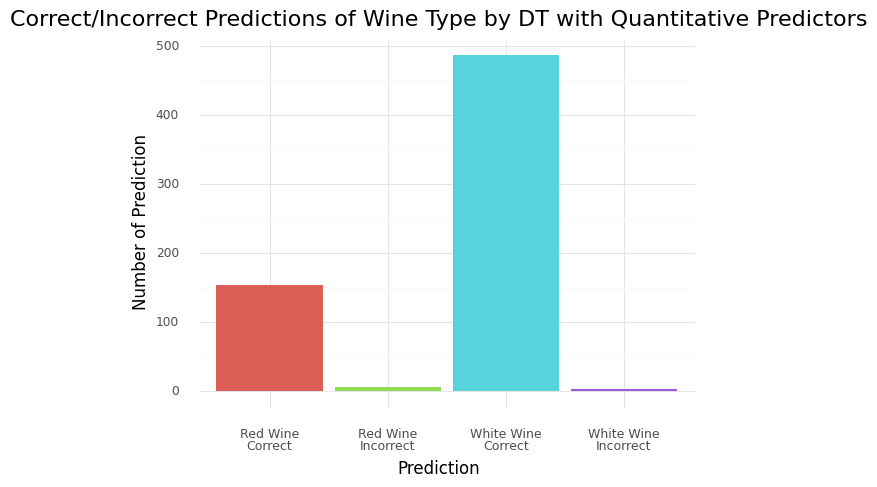

<ggplot: (8791507410457)>

In [17]:
(ggplot(wine_pred_df, aes(x="Prediction",y="Number of Prediction",fill = "Prediction"))+geom_col()+ theme_minimal()+
 ggtitle("Correct/Incorrect Predictions of Wine Type by DT with Quantitative Predictors") +
 theme(axis_title_x = element_text(size = 12),
      axis_title_y = element_text(size = 12),
      plot_title = element_text(size = 16),
      legend_position = "none",axis_text_x = element_text(size = 9)))

The average number of correct and incorrect decisions made about wine type (red or white) made by 10 decision tree models generated with K-Fold (k=10) based on a variety of quantitative predictors.

In [18]:
accDF = pd.DataFrame({"Model Number": range(1,11),"Accuracy Score": ac_testm})
accDF

,Model Number,Accuracy Score
0,1,0.983077
1,2,0.984615
2,3,0.986154
3,4,0.992308
4,5,0.986154
5,6,0.976923
6,7,0.989231
7,8,0.989214
8,9,0.979969
9,10,0.987673


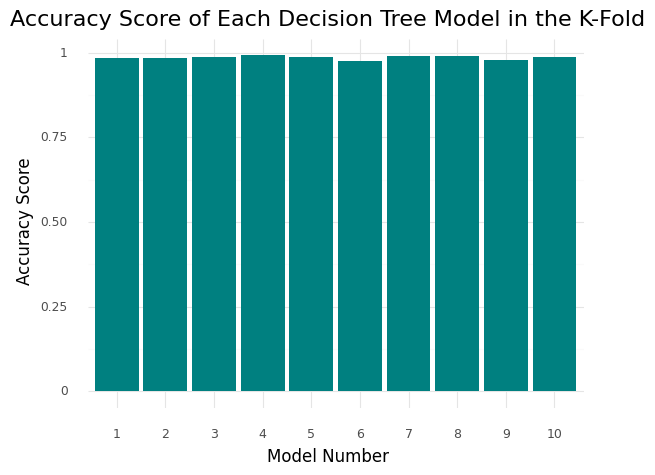

<ggplot: (8791469786593)>

In [19]:
(ggplot(accDF, aes(x="Model Number",y="Accuracy Score"))+geom_col(fill="teal")+ theme_minimal()+
 ggtitle("Accuracy Score of Each Decision Tree Model in the K-Fold") +
 theme(axis_title_x = element_text(size = 12),
      axis_title_y = element_text(size = 12),
      plot_title = element_text(size = 16),
      legend_position = "none",axis_text_x = element_text(size = 9))+ scale_x_discrete( 
                    limits=['1','2','3','4','5','6','7','8','9','10']))



The accuracy scores of 10 decision tree models, generated with K-Fold (k=10), predicting wine type (red or white) based on a variety of quantitative predictors.

ANSWER 5: The decision tree model, with height optimized via a gridsearch, was able to use the properties of a given wine to accurately predict whether it was red or white. The *Correct/Incorrect Predictions of Wine Type by DT with Quantitative Predictors* showcases data extracted from the confusion matrices of each of the decision tree models. Each confusion matrix allows for the visualization of the amount of wine correctly/incorrectly predicted to be white/red. Therefore, each of these data points can be extracted from each model's test data confusion matrix and averaged over the ten models. The data shown in *Correct/Incorrect Predictions of Wine Type by DT with Quantitative Predictors* illustrates these averages and shows that the amount of incorrectly predicted wine types is drastically lower than the amount of correctly predicted wine types for both red and white wine. Thus, decision trees predicted wine type based on quantitative wine properties quite well. This was further suppoerted by the accuracy score data for each of the ten models which can be seen in *Accuracy Score of Each Decision Tree Model in the K-Fold*; the accuracy score for each of the ten models was over 98% accurate (.98 accuracy score = 98% accurate) in predicting the type of a wine based on its physical/chemical quanitiative properies.

6) Do KMeans and Expectation Maximization with Mixtures of Gaussians perform similarly on the data despite their differences in defining clusters (with and without PCA)? Evaluate the performance of each using silhouette score and speak on cluster separation and cohesion?

*NOTE: I decided to use PCA for dimensionality reduction instead, as LASSO illustrated the importannce of all of the varibles in our data set (see #2). Furthermore, I decided to only include continuous variables in the clustering model, as clustering with categorical variables is quite challenging. I decided to not include a set graphs of that show one continuous variable vs. another and the cluster membership  color coded for each point; there were too many varibles to do so.*

In [23]:
featm = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Xm3 = datam[featm]

zm3 = StandardScaler()
Xm3[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']] = zm3.fit_transform(Xm3)

In [24]:
#WITHOUT PCA
Xdf = Xm3.copy(deep=True)

n_components = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

silsGM = []
silsKM = []
for n in n_components:
    
    gmm = GaussianMixture(n_components = n)
    gmm.fit(Xm3)
    
    km = KMeans(n_clusters = n)
    km.fit(Xm3)
    
    colNameGM = str(n) + "GM"
    colNameKM = str(n) + "KM"
    
    GMclusters = gmm.predict(Xm3)
    KMclusters = km.predict(Xm3)
    
    Xdf[colNameGM] = GMclusters
    Xdf[colNameKM] = KMclusters
    
    silsGM.append(silhouette_score(Xm3, GMclusters))
    silsKM.append(silhouette_score(Xm3, KMclusters))
    
    print("GMM silhouette for k =", n, ": ", silhouette_score(Xm3, GMclusters))
    print("KM silhouette for k =", n, ": ", silhouette_score(Xm3, KMclusters))
    
chosenGM = np.argmax(silsGM) + 2
chosenKM = np.argmax(silsKM) + 2

print()
print("Chosen number of clusters for GMM: ",chosenGM)
print()
print("Chosen number of clusters for KM: ",chosenKM)

GMM silhouette for k = 2 :  0.24847194399047937
KM silhouette for k = 2 :  0.2764785769203126
GMM silhouette for k = 3 :  0.21274189640577126
KM silhouette for k = 3 :  0.23504982125560692
GMM silhouette for k = 4 :  0.15947187572005522
KM silhouette for k = 4 :  0.24752677232611178
GMM silhouette for k = 5 :  0.07280098621367592
KM silhouette for k = 5 :  0.17987725906382387
GMM silhouette for k = 6 :  0.07975176371750796
KM silhouette for k = 6 :  0.1748151459672903
GMM silhouette for k = 7 :  0.05266207800328299
KM silhouette for k = 7 :  0.18018498700227709
GMM silhouette for k = 8 :  0.058304696006567035
KM silhouette for k = 8 :  0.15306791295000777
GMM silhouette for k = 9 :  0.02230143457191402
KM silhouette for k = 9 :  0.16235348577970626
GMM silhouette for k = 10 :  0.02320101179011467
KM silhouette for k = 10 :  0.15038620933344224
GMM silhouette for k = 11 :  0.03698321059171999
KM silhouette for k = 11 :  0.14508769245537023
GMM silhouette for k = 12 :  0.0430478581380341

In [25]:
GMsc = silhouette_score(Xm3, Xdf["2GM"])
KMsc = silhouette_score(Xm3, Xdf["2KM"])

In [26]:
#WITH PCA
datam1 = datam

zm4 = StandardScaler()
datam1[featm] = zm4.fit_transform(datam[featm])

pcam = PCA()
pcam.fit(datam1[featm])

pcaDF = pd.DataFrame({"expl_var" : pcam.explained_variance_ratio_, "pc": range(1,12), "cum_var": pcam.explained_variance_ratio_.cumsum()})
pcaDF

,expl_var,pc,cum_var
0,0.275443,1,0.275443
1,0.226711,2,0.502154
2,0.141486,3,0.643640
3,0.088232,4,0.731872
4,0.065443,5,0.797315
5,0.055210,6,0.852525
6,0.047560,7,0.900085
7,0.045592,8,0.945677
8,0.030639,9,0.976316
9,0.020700,10,0.997015


7 PC's explain 90% of all variance in data

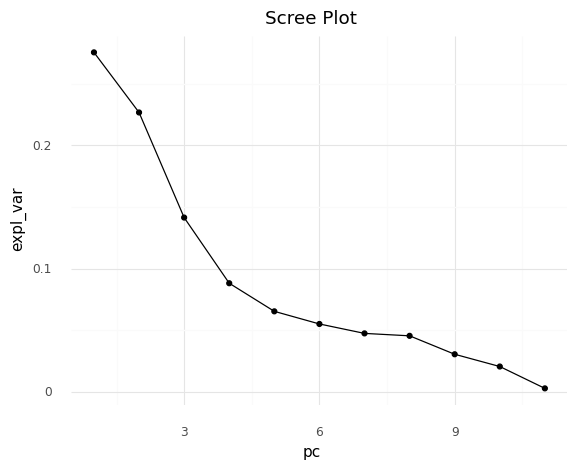

<ggplot: (8791453217981)>

In [27]:
(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point() + theme_minimal() + ggtitle("Scree Plot"))

The explained variance per principle component based on continuous predictor varibles in a white/red wine data set.

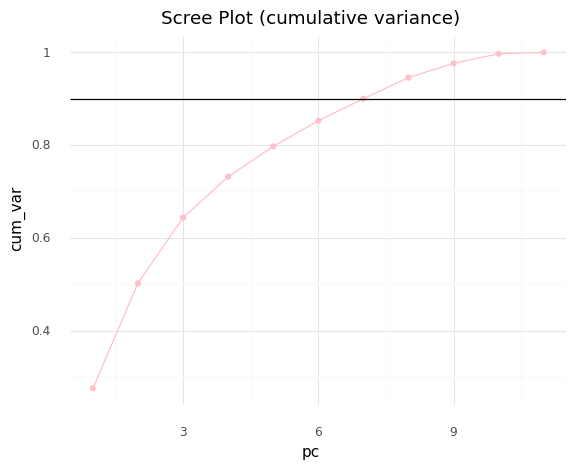

<ggplot: (8791450813605)>

In [28]:
(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "pink") +
 geom_point(color = "pink") + geom_hline(yintercept = 0.90) + theme_minimal() + ggtitle("Scree Plot (cumulative variance)"))

The explained variance per number of principle components based on continuous predictor varibles in a white/red wine data set (black line = 90% of total variance).

In [29]:
pcomps7 = pcam.transform(datam1[featm])

pcomps7 = pd.DataFrame(pcomps7[:,0:7])

pcomps7

,0,1,2,3,4,5,6
0,-2.164873,3.049020,3.901217,-0.517715,0.674398,0.028336,-1.203164
1,2.343890,1.308573,-0.899364,0.295054,0.013936,0.666574,-0.012181
2,0.624902,-0.824835,3.525689,2.199669,0.540288,0.534108,0.227159
3,-0.609534,-0.249326,-0.132580,1.901847,1.232066,-0.637181,0.235340
4,0.584195,-0.603225,-0.617098,-0.279449,0.323146,-1.967195,0.548351
...,...,...,...,...,...,...,...
6492,2.721137,1.095701,0.826692,0.963345,0.039056,-1.002873,-1.456629
6493,-0.411246,-2.637609,0.816494,-0.681992,-0.244013,-0.059651,0.978887
6494,1.825625,1.965807,-1.069660,-1.191557,0.618762,-0.211844,1.279077
6495,-2.967634,0.292602,-2.913562,-0.173352,-0.014640,-0.100365,0.274037


In [31]:
#WITHOUT PCA
Xdf4 = pcomps7.copy(deep=True)

n_components4 = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

silsGM4 = []
silsKM4 = []
for n in n_components4:
    
    gmm4 = GaussianMixture(n_components = n)
    gmm4.fit(pcomps7)
    
    km4 = KMeans(n_clusters = n)
    km4.fit(pcomps7)
    
    colNameGM4 = str(n) + "GM"
    colNameKM4 = str(n) + "KM"
    
    GMclusters4 = gmm4.predict(pcomps7)
    KMclusters4 = km4.predict(pcomps7)
    
    Xdf4[colNameGM4] = GMclusters4
    Xdf4[colNameKM4] = KMclusters4
    
    silsGM4.append(silhouette_score(pcomps7, GMclusters4))
    silsKM4.append(silhouette_score(pcomps7, KMclusters4))
    
    print("GMM silhouette for k =", n, ": ", silhouette_score(pcomps7, GMclusters4))
    print("KM silhouette for k =", n, ": ", silhouette_score(pcomps7, KMclusters4))
    
chosenGM4 = np.argmax(silsGM4) + 2
chosenKM4 = np.argmax(silsKM4) + 2

print()
print("Chosen number of clusters for GMM: ",chosenGM4)
print()
print("Chosen number of clusters for KM: ",chosenKM4)

GMM silhouette for k = 2 :  0.27252888797127134
KM silhouette for k = 2 :  0.30036342739781763
GMM silhouette for k = 3 :  0.22046461913585672
KM silhouette for k = 3 :  0.2616969675797734
GMM silhouette for k = 4 :  0.22062909316681506
KM silhouette for k = 4 :  0.2768799357255273
GMM silhouette for k = 5 :  0.14650614591208777
KM silhouette for k = 5 :  0.2022921348431141
GMM silhouette for k = 6 :  0.1602050477094696
KM silhouette for k = 6 :  0.20815104012606145
GMM silhouette for k = 7 :  0.11492575693484937
KM silhouette for k = 7 :  0.1887224532959629
GMM silhouette for k = 8 :  0.14365875831834649
KM silhouette for k = 8 :  0.18041873520669963
GMM silhouette for k = 9 :  0.08171060847080856
KM silhouette for k = 9 :  0.1625851933222506
GMM silhouette for k = 10 :  0.0697344137406676
KM silhouette for k = 10 :  0.16723996080406836
GMM silhouette for k = 11 :  0.08245735616208758
KM silhouette for k = 11 :  0.16541388053479641
GMM silhouette for k = 12 :  0.08545377415361771
KM s

In [32]:
pcaGMsc = silhouette_score(pcomps7, Xdf4["2GM"])
pcaKMsc = silhouette_score(pcomps7, Xdf4["2KM"])

print(KMsc,GMsc,pcaKMsc,pcaGMsc)

0.2764785769203126 0.24847194399047937 0.30036342739781763 0.27252888797127134


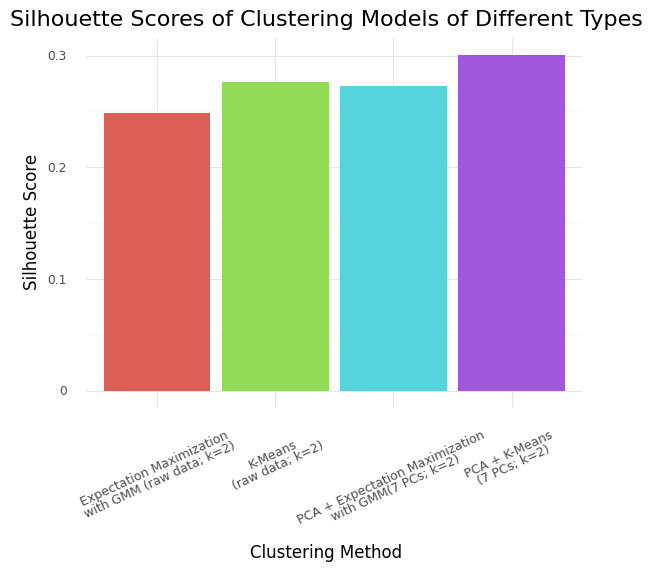

<ggplot: (8791450852597)>

In [33]:
SC_list = [KMsc,GMsc,pcaKMsc,pcaGMsc]
SC_list_labels = ['K-Means\n(raw data; k=2)','Expectation Maximization\nwith GMM (raw data; k=2)','PCA + K-Means\n(7 PCs; k=2)','PCA + Expectation Maximization\nwith GMM(7 PCs; k=2)']

SC_df = pd.DataFrame({"Clustering Method": SC_list_labels, "Silhouette Score": SC_list})

(ggplot(SC_df, aes(x="Clustering Method",y="Silhouette Score",fill = "Clustering Method"))+geom_col()+ theme_minimal()+
 ggtitle("Silhouette Scores of Clustering Models of Different Types") +
 theme(axis_title_x = element_text(size = 12),
      axis_title_y = element_text(size = 12),
      plot_title = element_text(size = 16),
      legend_position = "none",axis_text_x = element_text(size = 9,rotation=25, hjust=0.5)))

The silhouette scores from KMeans and Expectation Maximization with Mixtures of Gaussians with and without PCA (PCs = 7; # of clusters = 2).

ANSWER 6: KMeans performs slightly better than Expectation Maximization with Mixtures of Gaussians on the data with and without using PCA prior to clustering (as measured by silhouette score). As illustrated in *Silhouette Scores of Clustering Models of Different Types*, the silhouette score for the KMeans models was slightly higher than the silhouette score for the Expectation Maximization with Mixtures of Gaussians models, meaning that the clusters in the KMeans models were both moe cohesive (points within them were closer to one another) and more separate (points in different clusters were farther from one another). 

Interestingly, the models which incorperated PCA were observed to have a higher silhouette score (had more cohesive and separate clusters). This may have been due to the way that PCA functions. In using 7/11 PCs, the model was only trained on data that represented 90% of the training data set's variance. Therefore, about 10% of the data's variance was not seen by the model. Therefore, the creating clusters on a dataset with less data points that are more different from one another. This may have caused the separation of the clusters to increase which would, consequently, cause an increase in silhouette score. Overall though, silhouette scores were in the range of 0.25-0.30 which means that clusters were not very defined, as silhouette scores range from -1 to 1 (where 1 means drastic cohesion and separation).

Gaussian Mixture Models (EM) assumes that the clusters within the data assume eliptical shapes and clusters have similar amounts of data points, relatively speaking. Gaussian Mixture Models assumes eliptical shaped clusters, as it assumes a normal distribution of data points and accounts for different variances in clusters. It also uses soft assignment to assign points to clusters which involves giving each point a probability of being in a given cluster. In contrast, KMeans uses hard assignment when assigning points to clusters. KMeans also assumes that there are about the same number of points in each cluster similar to Gaussian Mixture Models but assumes sphereical clusters with no difference in variance. This assumption of sphereical clusters may have been ideal for the wine data set, as a higher cluster definition (as observed by silhouette scores) was illustrated for the KMeans which only allows for these cluster shapes. The added flexibility in cluster shape via the Gaussian Mixture Models (EM) may have caused clusters to overlap which would lower separation and thus, silhouette score.